NOTE:

Confusion matrix and classification report for each models is computed *immediately* after model creation 

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
df = pd.read_csv("/content/mobile_price_range_data.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [116]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [117]:
x=df.iloc[:,:20]
y=df['price_range']
print(x.head(),"\nType: ",type(x))
print(y.head(),"\nType: ",type(y))

   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145        5   6       1263      1716  2603    11     2          9   
3        131        6   9       1216      1786  2769    16     8         11   
4        141        2  14       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  
0        0 

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.26)

# Appling Logistic Regression


In [119]:
from sklearn.linear_model import LogisticRegression

In [120]:
m1 = LogisticRegression(max_iter=1000)
m1.fit(x_train,y_train)
ypred_m1 = m1.predict(x_test)
print(ypred_m1)
print(ypred_m1.shape)

[3 3 3 1 2 3 2 0 2 3 0 0 1 1 3 2 0 2 1 1 2 3 2 3 1 2 1 2 3 3 3 2 1 0 0 1 0
 1 1 3 1 0 2 1 3 1 3 0 0 2 0 1 1 1 3 1 0 2 0 1 0 3 3 0 2 2 1 3 3 3 3 3 3 3
 0 2 3 1 1 2 1 3 1 1 3 2 2 3 3 1 3 0 3 2 0 2 1 2 2 2 3 2 3 3 2 3 1 2 3 3 0
 3 2 0 0 3 1 0 0 0 0 3 3 2 3 1 0 1 3 1 0 1 1 1 1 2 0 1 0 0 0 0 3 3 2 2 1 3
 1 2 3 0 0 1 2 0 0 1 2 1 0 0 0 3 3 0 1 1 3 3 1 0 1 2 0 3 3 1 2 2 1 3 3 3 2
 1 1 0 2 3 0 0 1 0 3 0 0 1 3 3 0 3 2 2 2 2 0 1 3 0 0 3 2 0 0 2 0 2 3 2 2 3
 2 3 0 0 1 0 3 0 3 0 3 1 3 1 1 0 0 0 1 1 1 0 1 1 3 1 2 2 2 2 2 3 3 0 1 1 1
 0 1 3 0 0 2 1 2 0 1 3 3 2 3 1 1 1 0 0 1 0 3 2 0 1 2 2 0 0 3 2 2 1 2 2 2 3
 1 0 0 0 2 2 2 1 1 0 3 1 3 1 0 1 3 1 0 3 2 0 2 1 1 3 1 2 0 2 2 1 1 3 3 3 3
 3 2 3 1 3 0 0 2 2 0 2 1 0 2 1 2 1 2 1 0 3 1 3 1 0 2 0 3 3 0 3 3 0 2 3 2 2
 0 3 3 0 2 2 0 1 0 0 2 0 2 2 3 0 3 1 1 2 0 2 3 0 3 3 1 3 2 0 3 2 1 3 2 1 2
 1 3 1 3 1 2 2 1 2 3 0 3 1 0 2 0 1 0 0 1 0 0 1 3 3 1 0 1 3 3 0 2 3 2 3 3 0
 1 1 1 2 2 2 2 1 0 1 2 3 0 1 0 2 1 0 1 3 3 3 2 1 2 1 2 0 2 3 1 1 3 2 3 0 1
 1 2 3 3 3 3 3 3 3 0 3 2 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [121]:
print("train score",m1.score(x_train,y_train))
print("test score",m1.score(x_test,y_test))

train score 0.7141891891891892
test score 0.725


In [122]:
from sklearn.metrics import confusion_matrix ,classification_report
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[112  19   0   0]
 [ 17  80  27   5]
 [  0  26  66  21]
 [  0   1  27 119]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       131
           1       0.63      0.62      0.63       129
           2       0.55      0.58      0.57       113
           3       0.82      0.81      0.82       147

    accuracy                           0.73       520
   macro avg       0.72      0.72      0.72       520
weighted avg       0.73      0.72      0.73       520



# Appling KNN algorithm

In [123]:
ram=df.iloc[:,13:14]
inter_memory=df.iloc[:,6:7]
print(ram.head(),)
print(inter_memory.head())

    ram
0  2549
1  2631
2  2603
3  2769
4  1411
   int_memory
0           7
1          53
2          41
3          10
4          44


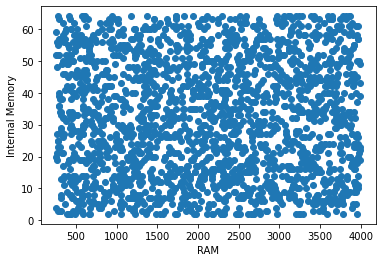

In [124]:

plt.scatter(df.iloc[:,13:14],df.iloc[:,6:7])   #ram  and internal_memory
plt.xlabel("RAM")
plt.ylabel("Internal Memory")
plt.plot()
plt.show()


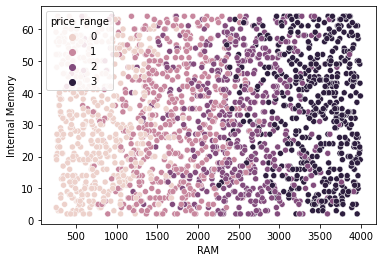

In [125]:
import seaborn as sns
sns.scatterplot(x=df['ram'],y=df['int_memory'],hue=df['price_range'])   #ram  and internal_memory
plt.xlabel("RAM")
plt.ylabel("Internal Memory")
plt.plot()
plt.show()


In [136]:
from sklearn.neighbors import KNeighborsClassifier
m2 = KNeighborsClassifier(n_neighbors=11)  # K=11
m2.fit(x_train,y_train)
ypred_m2=m2.predict(x_test)

In [139]:
ypred_m2

array([3, 3, 3, 1, 1, 3, 2, 0, 3, 2, 0, 0, 1, 1, 3, 2, 0, 1, 1, 1, 2, 3,
       3, 3, 1, 2, 2, 1, 3, 2, 3, 2, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 2, 1,
       3, 1, 2, 0, 0, 3, 0, 1, 1, 2, 3, 1, 0, 1, 0, 1, 0, 3, 3, 1, 3, 1,
       1, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 1, 0, 3, 1, 3, 3, 2, 3, 2, 2, 3,
       2, 1, 3, 0, 1, 2, 1, 2, 2, 2, 1, 1, 3, 2, 3, 2, 2, 3, 1, 2, 3, 2,
       0, 3, 2, 0, 1, 3, 1, 0, 1, 0, 1, 3, 3, 2, 3, 0, 0, 1, 3, 1, 0, 1,
       1, 1, 1, 3, 0, 1, 0, 0, 0, 0, 2, 3, 1, 2, 0, 3, 1, 2, 3, 0, 1, 1,
       1, 0, 1, 0, 3, 1, 0, 0, 0, 3, 2, 0, 1, 1, 3, 3, 0, 1, 0, 2, 0, 3,
       3, 1, 1, 3, 1, 3, 3, 3, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 3, 0, 0, 0,
       3, 3, 1, 3, 3, 2, 2, 2, 0, 1, 3, 0, 0, 3, 2, 0, 0, 1, 0, 2, 3, 2,
       2, 3, 2, 3, 0, 0, 1, 0, 1, 0, 3, 0, 3, 2, 2, 2, 1, 0, 0, 0, 1, 1,
       0, 0, 2, 1, 3, 1, 2, 3, 1, 3, 1, 3, 3, 0, 1, 2, 1, 0, 1, 3, 0, 0,
       3, 1, 3, 0, 0, 3, 3, 1, 3, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 2,
       0, 0, 3, 2, 2, 1, 2, 2, 1, 3, 2, 0, 0, 0, 1,

In [137]:
print("train score",m2.score(x_train,y_train))
print("test score",m2.score(x_test,y_test))

train score 0.952027027027027
test score 0.9384615384615385


In [138]:
print(confusion_matrix(y_test,ypred_m2))
print(classification_report(y_test,ypred_m2))

[[127   4   0   0]
 [  6 119   4   0]
 [  0   4 103   6]
 [  0   0   8 139]]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       131
           1       0.94      0.92      0.93       129
           2       0.90      0.91      0.90       113
           3       0.96      0.95      0.95       147

    accuracy                           0.94       520
   macro avg       0.94      0.94      0.94       520
weighted avg       0.94      0.94      0.94       520



# Appling SVM Classifier with linear and rbf model

In [130]:
from sklearn.svm import SVC
m3 = SVC(kernel="linear", C=1)     # using 'linear' Kernal
m3.fit(x_train,y_train)
ypred_m3=m3.predict(x_test)
print(ypred_m3)

[3 3 3 2 2 3 2 0 3 3 0 0 1 1 3 2 0 1 1 1 2 3 3 3 1 2 2 1 3 2 3 2 1 0 0 1 0
 0 0 3 0 0 2 1 3 1 2 0 0 3 0 1 1 2 3 1 0 1 0 0 0 3 3 1 3 1 1 3 3 3 3 3 3 3
 0 3 3 1 0 3 1 3 3 2 3 2 2 3 2 1 3 0 1 2 1 2 1 3 1 1 3 2 3 3 2 3 1 2 3 3 0
 3 2 0 1 3 1 1 1 0 1 3 3 2 3 0 0 1 3 1 0 1 1 1 1 3 0 1 0 0 0 0 2 3 2 2 0 3
 1 2 3 0 1 1 1 0 1 0 3 1 0 0 0 3 2 0 1 1 2 3 0 0 0 2 0 3 3 1 1 3 1 3 3 3 1
 1 2 0 2 2 0 0 1 0 3 0 0 1 3 2 1 3 3 2 2 2 0 1 3 0 0 3 2 0 0 1 0 2 3 2 2 3
 2 3 0 0 1 0 1 0 3 0 3 2 3 2 1 0 0 1 1 2 0 0 2 2 3 1 2 3 1 3 1 3 3 0 1 2 1
 0 1 3 0 0 3 1 3 0 0 3 3 1 3 0 1 1 0 0 1 0 2 2 0 2 2 2 0 0 3 2 2 1 3 2 1 3
 2 0 0 1 1 3 3 1 1 1 3 1 3 0 1 0 2 2 0 3 2 0 2 0 1 2 1 2 0 2 3 2 2 3 3 3 3
 3 1 3 1 3 0 1 3 2 0 2 1 1 3 2 3 2 2 1 0 2 1 3 1 0 1 0 2 3 0 3 3 0 1 3 2 2
 0 3 3 0 1 3 0 1 0 0 2 0 2 1 3 0 3 2 1 1 1 2 3 0 3 3 2 3 2 0 2 2 2 3 2 1 3
 2 3 1 3 1 1 3 1 1 3 0 3 1 0 2 0 2 0 0 0 0 0 1 3 2 1 1 1 2 3 0 2 2 2 3 3 1
 1 1 2 2 2 2 2 1 0 1 2 3 0 1 0 2 1 0 1 3 3 3 1 1 3 1 1 0 3 2 0 1 3 3 3 1 0
 2 2 3 3 2 3 3 1 3 0 3 2 

In [131]:
print("Training Score: ",m3.score(x_train,y_train))
print("Testing Score: ",m3.score(x_test,y_test))

Training Score:  0.9905405405405405
Testing Score:  0.9692307692307692


In [132]:
print(confusion_matrix(y_test,ypred_m3))
print(classification_report(y_test,ypred_m3))



[[125   6   0   0]
 [  2 124   3   0]
 [  0   2 109   2]
 [  0   0   1 146]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.97       131
           1       0.94      0.96      0.95       129
           2       0.96      0.96      0.96       113
           3       0.99      0.99      0.99       147

    accuracy                           0.97       520
   macro avg       0.97      0.97      0.97       520
weighted avg       0.97      0.97      0.97       520



In [133]:
m4 = SVC(kernel="rbf")     # using 'rbf' Kernal
m4.fit(x_train,y_train)
ypred_m4=m4.predict(x_test)
print(ypred_m4)

[3 3 3 2 1 3 2 0 3 2 0 0 1 1 3 3 0 1 1 1 2 3 3 3 1 1 2 1 3 2 3 2 1 0 0 1 0
 0 0 3 0 0 2 1 3 1 2 0 0 2 0 1 1 2 3 1 0 1 0 1 0 3 3 1 3 1 1 3 3 3 3 3 3 3
 0 3 3 1 0 3 1 3 3 2 3 2 2 3 2 0 3 0 1 2 1 2 1 3 1 1 3 2 3 2 2 3 1 2 3 3 0
 3 2 0 1 3 1 0 1 0 1 3 3 2 3 0 0 1 3 1 0 2 1 1 1 3 0 1 0 0 0 0 2 3 1 2 0 3
 1 2 3 0 1 1 1 0 1 0 3 1 0 0 0 3 2 0 1 1 3 3 0 0 0 2 0 3 3 1 1 3 1 3 3 3 1
 1 2 0 2 2 0 0 1 0 3 0 0 1 3 3 1 3 3 2 2 2 0 1 3 0 0 3 2 0 0 1 0 2 3 2 2 3
 2 3 0 0 1 0 1 0 3 0 3 2 2 2 1 0 0 0 1 2 0 0 2 1 3 1 2 3 1 3 1 3 3 0 1 2 1
 0 1 3 0 0 3 1 3 0 0 3 2 1 3 0 1 1 0 0 1 0 2 2 0 1 2 2 0 0 3 2 2 1 2 2 1 3
 2 0 0 0 1 3 3 1 1 1 3 1 3 0 1 0 2 2 0 3 2 0 2 0 1 2 1 2 0 2 3 2 2 3 3 3 3
 3 1 3 1 3 0 1 3 2 0 2 1 1 3 2 3 2 2 1 0 3 1 3 1 0 1 0 2 3 0 3 3 0 1 3 2 2
 0 3 3 0 1 3 0 1 0 0 2 0 2 1 3 0 3 2 1 1 0 2 3 0 3 3 2 3 2 0 2 2 2 3 2 0 3
 2 3 1 3 1 1 3 1 1 3 0 3 1 0 3 0 2 0 0 0 0 0 1 3 2 1 0 1 2 3 0 2 2 2 3 3 1
 1 1 2 2 2 2 2 1 0 1 2 3 0 1 0 2 1 0 1 3 3 3 1 0 3 1 1 0 3 2 1 1 3 3 3 1 1
 2 2 3 3 2 3 3 1 3 0 3 2 

In [134]:
print("Training Score: ",m4.score(x_train,y_train))
print("Testing Score: ",m4.score(x_test,y_test))

Training Score:  0.9567567567567568
Testing Score:  0.9538461538461539


In [135]:
print(confusion_matrix(y_test,ypred_m4))
print(classification_report(y_test,ypred_m4))

[[128   3   0   0]
 [  4 123   2   0]
 [  0   5 103   5]
 [  0   0   5 142]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       131
           1       0.94      0.95      0.95       129
           2       0.94      0.91      0.92       113
           3       0.97      0.97      0.97       147

    accuracy                           0.95       520
   macro avg       0.95      0.95      0.95       520
weighted avg       0.95      0.95      0.95       520



# 6)Report the model with the best accuracy.

                      **Accuracy in  decimal**
Logistic Regression:--->   0.73

KNN Classification:---->    0.94 

SVM Classifier: 

  **1**.**linear** **kernel**:---->     **0.97**

  2.rbf kernel:---->        0.95




Using above observation we can conclude that using "**SVM Classifier model (kernel=linear)**" We got **best accuracy**